In [1]:
# Loading packages
from google.colab import drive
import os
from torchvision import transforms 
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
import torch.optim as optim
import random
from tqdm.notebook import tqdm
import numpy as np

# Also, as we have a auxiliar python file with function, we go to use it
from cnn_functions import *

In [2]:
# As our dataset is mounted in Google Drive, we need to get access to it.
drive.mount('/content/drive')

# Dataset path. You should change the dataset path to the location that you place the data.
data_dir = '/content/drive/MyDrive/DeepLearning/dataset/'
classes = os.listdir(data_dir)

Mounted at /content/drive


In [3]:
# Performing Image Transformations
train_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.RandomHorizontalFlip(),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [4]:
# Checking the dataset training size
dataset = ImageFolder(data_dir, transform=train_transform)
print('Size of training dataset :', len(dataset))

Size of training dataset : 5400


In [5]:
# Viewing one of images shape
img, label = dataset[100]
print(img.shape)

torch.Size([3, 224, 224])


In [6]:
# Setting seed so that value won't change everytime
# Splitting the dataset to training, validation, and testing category
torch.manual_seed(1)
val_size = len(dataset)//20
test_size = len(dataset)//10
train_size = len(dataset) - val_size - test_size

In [7]:
# Random Splitting
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
# Check the size of each dataset
len(train_ds), len(val_ds),len(test_ds)  

(4590, 270, 540)

In [8]:
# Define batch size
batch_size = 12
# Define a generator of random values
g_cpu = torch.Generator()
g_cpu.manual_seed(123)
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True,generator  = g_cpu)
val_loader = DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=2, pin_memory=True)

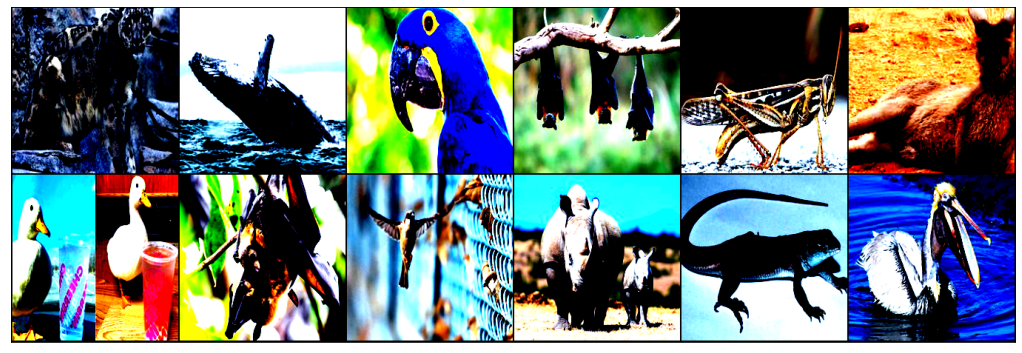

In [9]:
# We can see some of these images available in one batch
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=6).permute(1, 2, 0))
    break

In [10]:
# Now, we go to consider some parameters to start to create our models
input_size = torch.randn(1, 3, 224, 224)
output_size = 90

# Pass our data to GPU
device = get_default_device()
device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

# **Create Basic CNN Model**

In [11]:
# First, it is necessary create a class
class BasicCNN(nn.Module):
    def __init__(self,classes):
      super().__init__()
      self.num_classes=classes
      self.conv1=nn.Conv2d(3,64,5,1)
      self.conv2=nn.Conv2d(64,128,3,1)
      self.conv3=nn.Conv2d(128,128,3,1)
      self.conv4=nn.Conv2d(128,128,3,1)
      self.fc1=nn.Linear(18432,self.num_classes)

    def forward(self,X):
      X=F.relu(self.conv1(X)) 
      X=F.max_pool2d(X,2,2)
      X=F.relu(self.conv2(X))
      X=F.max_pool2d(X,2,2)
      X=F.relu(self.conv3(X))
      X=F.max_pool2d(X,2,2)
      X=F.relu(self.conv4(X))
      X=F.max_pool2d(X,2,2)
      X=X.view(-1,18432)
      X=self.fc1(X)

      # Apply softmax to x
      output = F.log_softmax(X, dim=1)
      return output

In [12]:
# Reporting the Flops of this model
print_model_parm_flops(BasicCNN(90),input_size, detail=False)

 + Number of FLOPs: 3.07G


# **Basic CNN, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.01, epochs:20**

In [13]:
cnn_sgd_lr001_performance = fit_model(BasicCNN(90),train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.435


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.361


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.297


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.186


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.984


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.677


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.296


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.816


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.539


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.231


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.868


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.698


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.648


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.435


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.347


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.358


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.208


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.129


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.004


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.062
Finished Training


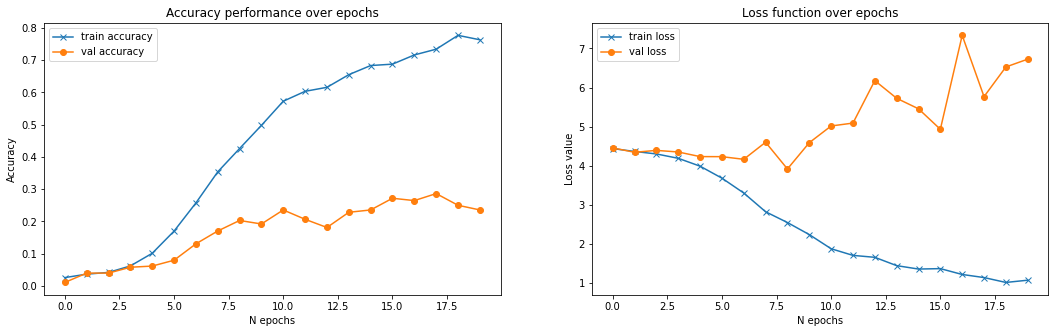

In [14]:
# Plot results
plot_performance(cnn_sgd_lr001_performance[1],cnn_sgd_lr001_performance[2])

In [15]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sgd_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.27222228050231934


# **Basic CNN, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.001, epochs:20**

In [16]:
cnn_sdg_lr01_performance = fit_model(BasicCNN(90),train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.446


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.116


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.741


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.357


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.953


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.473


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.002


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.461


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.030


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.666


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.458


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.301


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.260


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.148


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.104


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.078


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.070


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.042


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.026


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.016
Finished Training


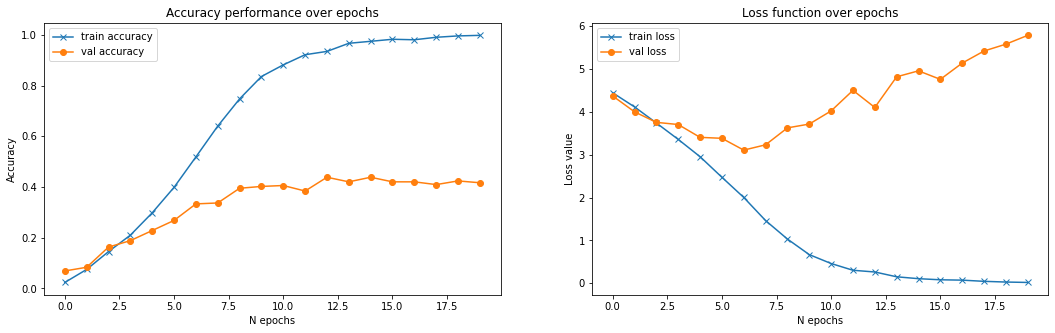

In [17]:
# Plot results
plot_performance(cnn_sdg_lr01_performance[1],cnn_sdg_lr01_performance[2])

In [18]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sdg_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.43888890743255615


# **Basic CNN, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.01, epochs:20**

In [19]:
cnn_adam_lr001_performance = fit_model(BasicCNN(90),train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:6.897


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.510


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.510


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.510


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.510


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.510


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.510


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.509


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.510
Finished Training


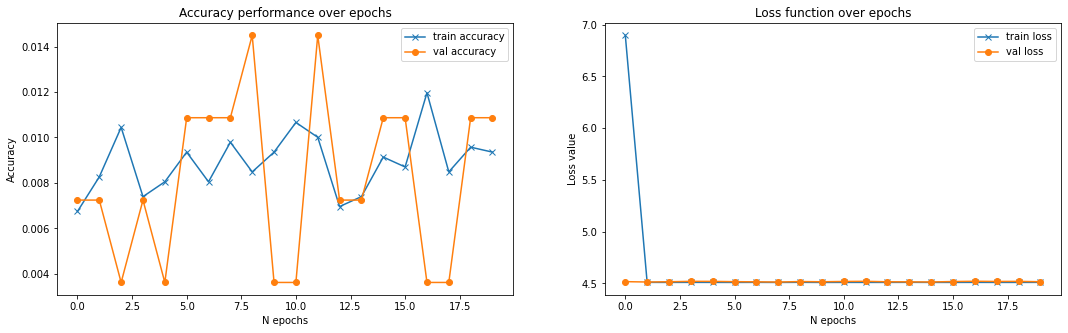

In [20]:
# Plot results
plot_performance(cnn_adam_lr001_performance[1],cnn_adam_lr001_performance[2])

In [21]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.003703703870996833


# **Basic CNN, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.001, epochs:20**

In [22]:
cnn_adam_lr01_performance = fit_model(BasicCNN(90),train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.446


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.400


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.243


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.055


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.989


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.642


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.289


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.854


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.516


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.172


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.917


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.722


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.519


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.460


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.340


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.238


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.153


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.088


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.082


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.044
Finished Training


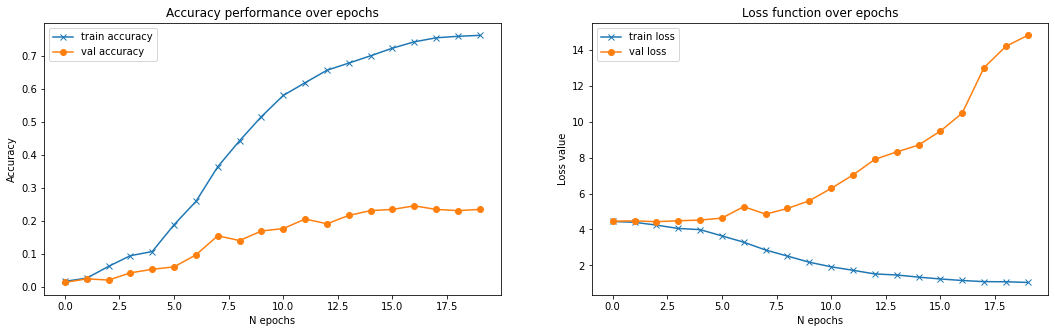

In [23]:
# Plot results
plot_performance(cnn_adam_lr01_performance[1],cnn_adam_lr01_performance[2])

In [24]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.2666667103767395
